# SciPy Optimize Roots
## Multivariable Roots

`scipy.optimize.root` solves the multivariable system of equations
$$
\vec{f}(\vec{x}) = \vec{0}
$$
You can have any number of functions $f_i$ of and number of variables $\vec{x}\in \mathbb{R}^m$.

Know your problem before passing it to any numerical routine.  Do you actually have a zero at all?  Or do you have a whole surface of zeros?

The methods often combine using $\vec{f}$ as a sort of gradient and trying to minimize $|\vec{f}|^2$.  But as real gradients live in a more restricted function space than $\vec{f}$ and only the global minimums of $|\vec{f}|^2$ are roots, this is only a helpful starting point.

In [1]:
# Importing the packages for the example
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
f0 = lambda x : x[0]**2 + x[1]**2 - 10
f1 = lambda x : 2*x[0] - x[1] -2

f = lambda x : np.array([f0(x), f1(x)])

Text(0.5, 1.0, 'Quiver of Function and Zero contours')

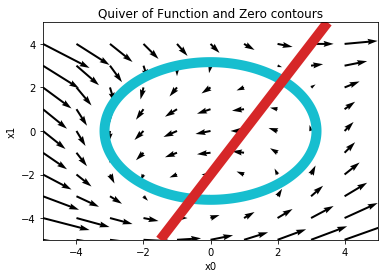

In [3]:
x0 = np.arange(-5,5,.01)
x1 = np.arange(-5,5,.01)
# creating 2D array
x0_a, x1_a = np.meshgrid(x0,x1)

x0p = np.arange(-5,5,1)
# creating 2D array
x0p_a, x1p_a = np.meshgrid(x0p,x0p)

fig, ax = plt.subplots()
cs = ax.contour(x0_a, x1_a, f0([x0_a,x1_a]),
                levels=[0],linewidths=10,colors="tab:cyan")
cs2 = ax.contour(x0_a, x1_a, f1([x0_a,x1_a]),
                 levels=[0],linewidths=10,colors="tab:red")
quiver = ax.quiver(x0p_a,x1p_a,f0([x0p_a,x1p_a]),f1([x0p_a,x1p_a]))

ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.set_title("Quiver of Function and Zero contours")

In [6]:
starting_point=[0,0]

result=optimize.root(f,starting_point)
print(result)

    fjac: array([[ 0.22342913, -0.97472018],
       [ 0.97472018,  0.22342913]])
     fun: array([1.77635684e-15, 0.00000000e+00])
 message: 'The solution converged.'
    nfev: 20
     qtf: array([-2.58555759e-13, -1.12895557e-12])
       r: array([-2.05187094, -0.4894346 , -6.61087376])
  status: 1
 success: True
       x: array([-0.556466  , -3.11293199])
